In [83]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation as R

In [84]:
def get_data_surface_type(surface_type=None, all_surface=False):
    x_train_surface = x_train[np.logical_or(np.isin(x_train.series_id.values,
                                                    y_train[y_train.surface == surface_type].series_id.values),
                                            all_surface)]
    rotation_angles = R.from_quat(np.column_stack((
        x_train_surface.orientation_X, x_train_surface.orientation_Y, x_train_surface.orientation_Z,
        x_train_surface.orientation_W)))
    euler_rotation_angles = rotation_angles.as_rotvec()
    angles_frame = pd.DataFrame({'row_id': x_train_surface.row_id,
                                 'series_id': x_train_surface.series_id,
                                 'measurement_number': x_train_surface.measurement_number,
                                 'orientation_x': euler_rotation_angles[:, 0],
                                 'orientation_y': euler_rotation_angles[:, 1],
                                 'orientation_z': euler_rotation_angles[:, 2],
                                 'angular_velocity_x': x_train_surface.angular_velocity_X,
                                 'angular_velocity_y': x_train_surface.angular_velocity_Y,
                                 'angular_velocity_z': x_train_surface.angular_velocity_Z,
                                 'linear_acceleration_x': x_train_surface.linear_acceleration_X,
                                 'linear_acceleration_y': x_train_surface.linear_acceleration_Y,
                                 'linear_acceleration_z': x_train_surface.linear_acceleration_Z})
    return angles_frame

In [85]:
def plot_fft_data(data_frame, plotting_axes, row_idx, surface_type):
    col_idx = 0
    for series_id in data_frame.series_id.unique()[:3]:
        x_train_series = data_frame[data_frame.series_id == series_id]
        for i in range(3, 4):
            sp = np.fft.fft(x_train_series.iloc[:, i])
            t = np.arange(128)
            freq = np.fft.fftfreq(t.shape[-1])
            plotting_axes[row_idx, col_idx].plot(freq, sp.real, label='Real')
            plotting_axes[row_idx, col_idx].plot(freq, sp.imag, label='Imaginary')
        plotting_axes[row_idx, col_idx].legend()
        plotting_axes[row_idx, col_idx].set_title(surface_type)
        col_idx += 1


In [86]:
def calculate_orientation_from_acceleration(data_frame):
    x_acceleration = data_frame.linear_acceleration_x
    y_acceleration = data_frame.linear_acceleration_y
    z_acceleration = data_frame.linear_acceleration_z
    pitch = np.arctan2(-x_acceleration, (np.sqrt(y_acceleration * y_acceleration + z_acceleration * z_acceleration)))
    roll = np.arctan2(y_acceleration, np.sign(z_acceleration) * np.sqrt(
        z_acceleration * z_acceleration + 0.001 * x_acceleration * x_acceleration))
    return pd.DataFrame({'roll_x': roll, 'pitch_y': pitch})

In [87]:
def get_complete_surface_data(x_data, y_data, surface):
    return x_data[np.isin(x_data.series_id.values, y_data[y_data.surface == surface].series_id.values)]

In [88]:
def plot_two_orientations(x_data, y_data, surface, num_samples=10):
    x_train_concrete = get_complete_surface_data(x_data, y_data, surface)
    for series_id in x_train_concrete.series_id.unique()[:num_samples]:
        x_train_concrete_series = x_train_concrete[x_train_concrete.series_id == series_id]
        plt.plot(x_train_concrete_series.measurement_number, x_train_concrete_series.orientation_minus_roll_x)
        plt.plot(x_train_concrete_series.measurement_number, x_train_concrete_series.orientation_minus_pitch_y)
        plt.title(surface)
        plt.legend()
        plt.show()


In [89]:
def plot_x_orientation(x_data, y_data, surface, num_samples=10):
    x_train_concrete = get_complete_surface_data(x_data, y_data, surface)
    for series_id in x_train_concrete.series_id.unique()[:num_samples]:
        x_train_concrete_series = x_train_concrete[x_train_concrete.series_id == series_id]
        plt.plot(x_train_concrete_series.measurement_number, x_train_concrete_series.orientation_minus_roll_x)
        plt.title(surface)
        plt.legend()
        plt.show()


In [90]:
def plot_y_orientation(x_data, y_data, surface, num_samples=10):
    x_train_concrete = get_complete_surface_data(x_data, y_data, surface)
    for series_id in x_train_concrete.series_id.unique()[:num_samples]:
        x_train_concrete_series = x_train_concrete[x_train_concrete.series_id == series_id]
        plt.plot(x_train_concrete_series.measurement_number, x_train_concrete_series.orientation_minus_pitch_y)
        plt.title(surface)
        plt.legend()
        plt.show()


In [91]:
def plot_y_orientation(x_data, y_data, surface, num_samples=10):
    x_train_concrete = get_complete_surface_data(x_data, y_data, surface)
    for series_id in x_train_concrete.series_id.unique()[:num_samples]:
        x_train_concrete_series = x_train_concrete[x_train_concrete.series_id == series_id]
        plt.plot(x_train_concrete_series.measurement_number, x_train_concrete_series.orientation_minus_pitch_y)
        plt.title(surface)
        plt.legend()
        plt.show()


In [92]:
def plot_some_column(x_data, y_data, surface,column_names, num_samples=10):
    x_train_concrete = get_complete_surface_data(x_data, y_data, surface)
    for series_id in x_train_concrete.series_id.unique()[:num_samples]:
        x_train_concrete_series = x_train_concrete[x_train_concrete.series_id == series_id]
        for column_name in column_names:
            plt.plot(x_train_concrete_series.measurement_number, x_train_concrete_series[column_name])
        plt.title(surface)
        plt.legend()
        plt.show()


In [93]:
x_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
x_test = pd.read_csv('data/X_test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
x_train = get_data_surface_type(all_surface=True)
x_train = x_train.join(calculate_orientation_from_acceleration(x_train))
x_train = x_train.join(pd.DataFrame({'orientation_x_variation': x_train.orientation_x - np.mean(x_train.orientation_x),
                                     'orientation_y_variation': x_train.orientation_y - np.mean(x_train.orientation_y),
                                     'orientation_z_variation': x_train.orientation_z - np.mean(x_train.orientation_z),
                                     'roll_x_variation': x_train.orientation_x - np.mean(x_train.roll_x),
                                     'pitch_y_variation': x_train.orientation_x - np.mean(x_train.pitch_y),
                                     'orientation_minus_roll_x': x_train.orientation_x - x_train.roll_x,
                                     'orientation_minus_pitch_y': x_train.orientation_y - x_train.pitch_y}))

In [94]:
x_train = x_train.join(pd.DataFrame({'orientation_minus_roll_x_variation': x_train.orientation_minus_roll_x-np.mean(x_train.orientation_minus_roll_x),
                                    'orientation_minus_pitch_y_variation': x_train.orientation_minus_pitch_y-np.mean(x_train.orientation_minus_pitch_y)}))

In [ ]:
x_train = x_train.join(pd.DataFrame({''}))

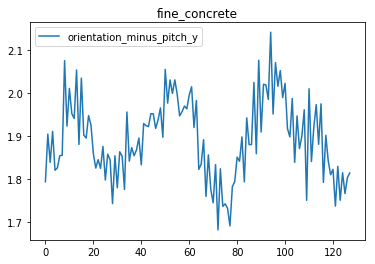

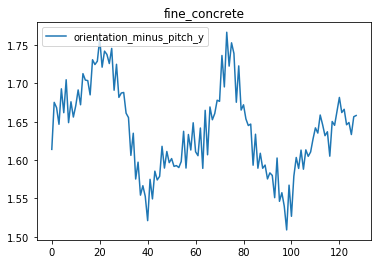

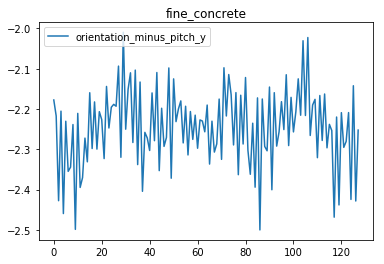

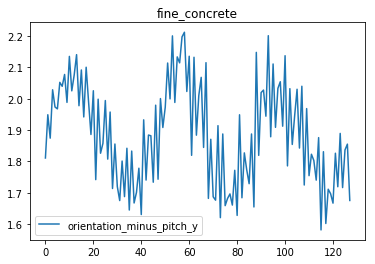

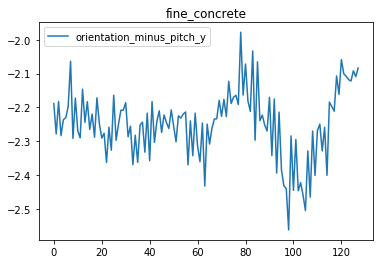

In [48]:
plot_y_orientation(x_train,y_train,'fine_concrete',5)

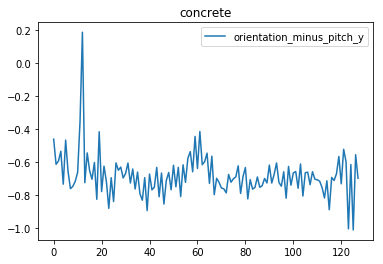

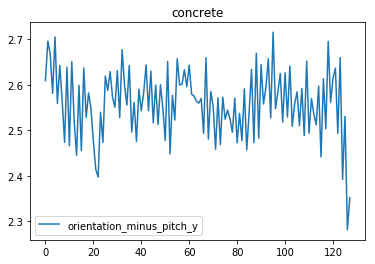

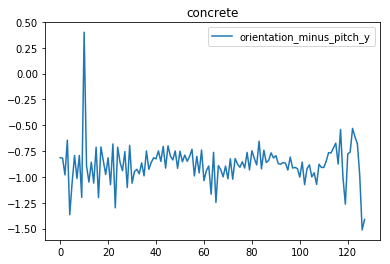

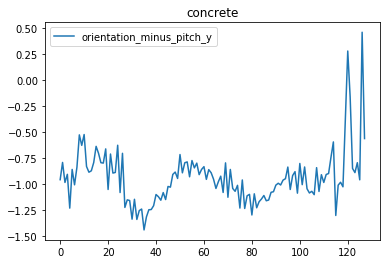

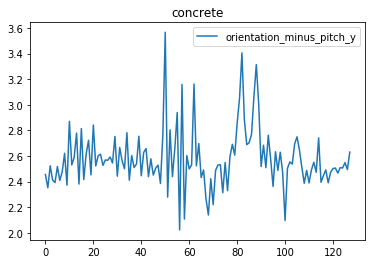

In [49]:
plot_y_orientation(x_train,y_train,'concrete',5)

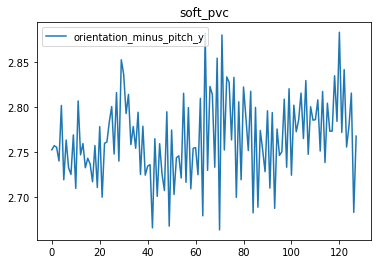

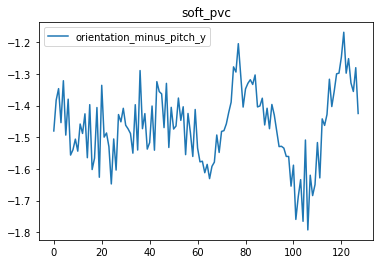

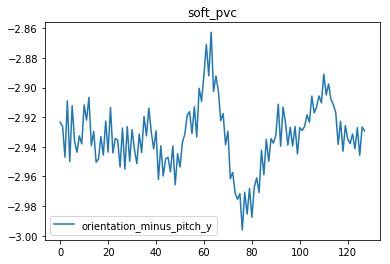

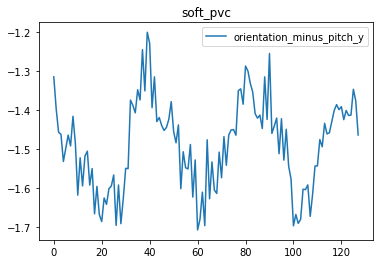

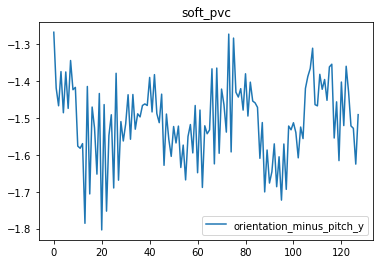

In [50]:
plot_y_orientation(x_train,y_train,'soft_pvc',5)

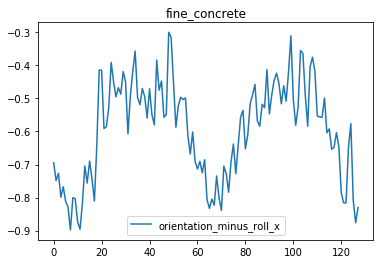

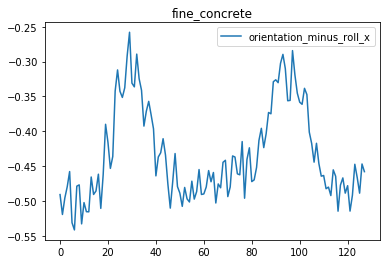

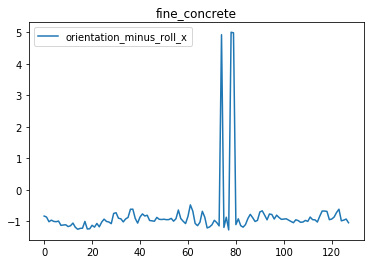

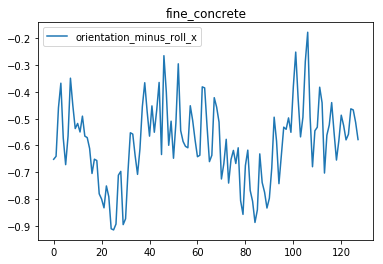

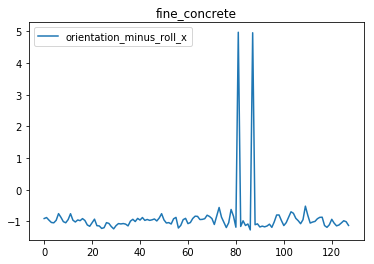

In [51]:
plot_x_orientation(x_train,y_train,'fine_concrete',5)

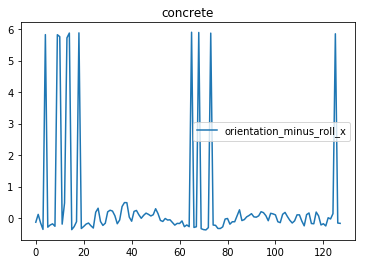

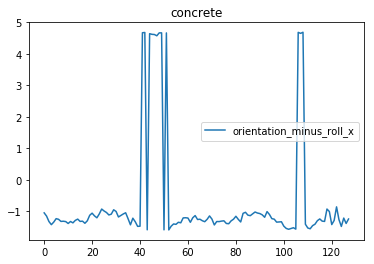

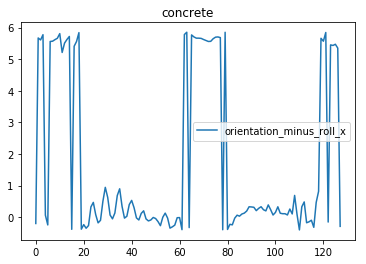

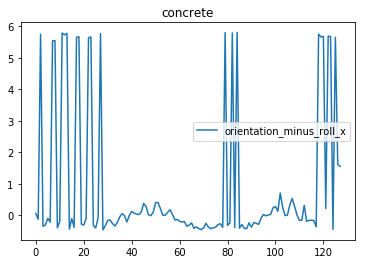

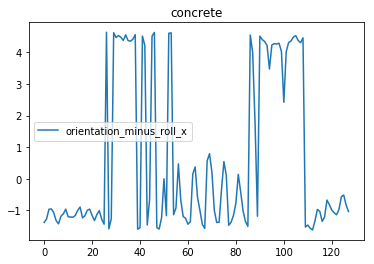

In [52]:
plot_x_orientation(x_train,y_train,'concrete',5)

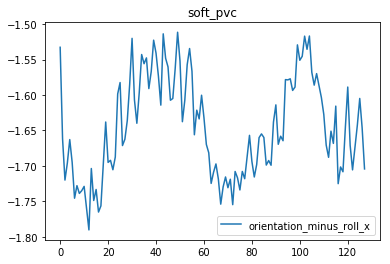

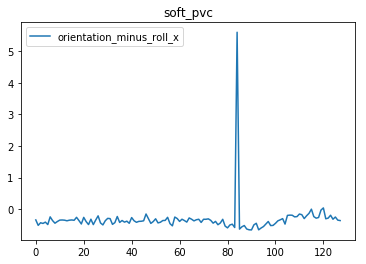

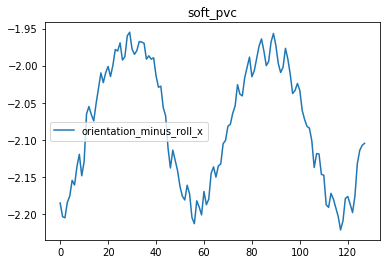

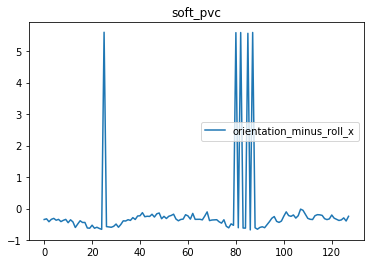

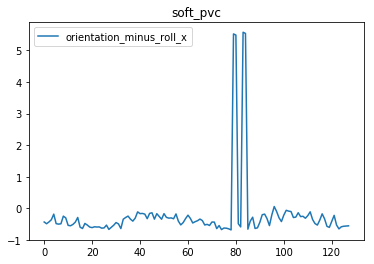

In [53]:
plot_x_orientation(x_train,y_train,'soft_pvc',5)

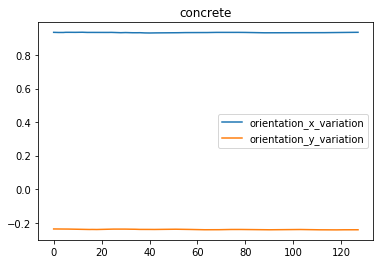

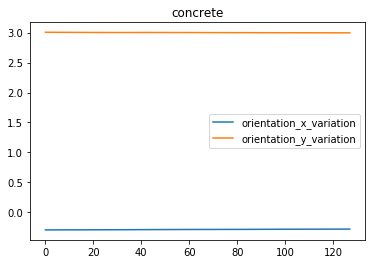

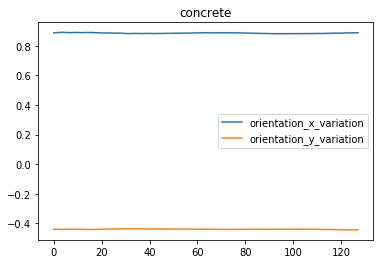

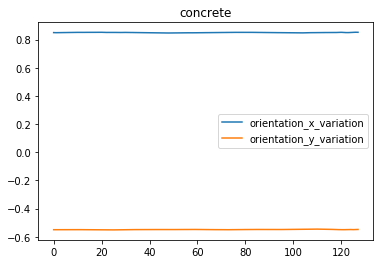

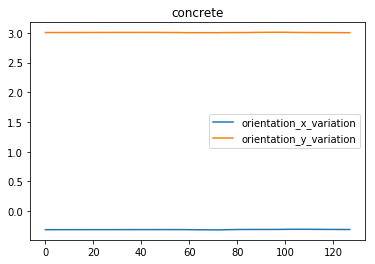

In [70]:
plot_some_column(x_train,y_train,'concrete',('orientation_x_variation','orientation_y_variation'),5)

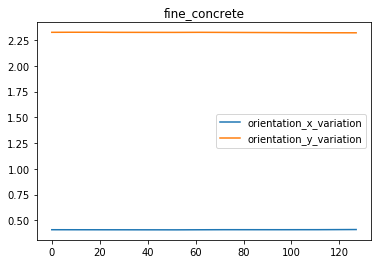

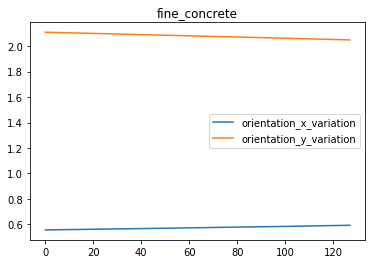

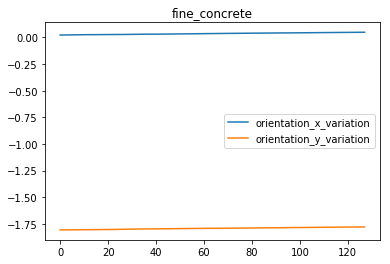

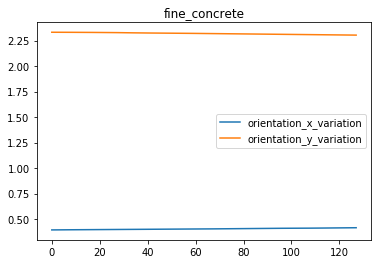

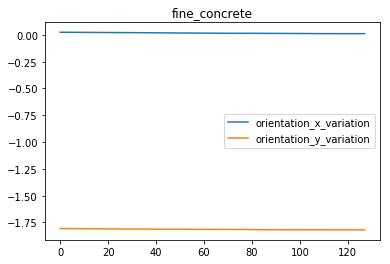

In [71]:
plot_some_column(x_train,y_train,'fine_concrete',('orientation_x_variation','orientation_y_variation'),5)

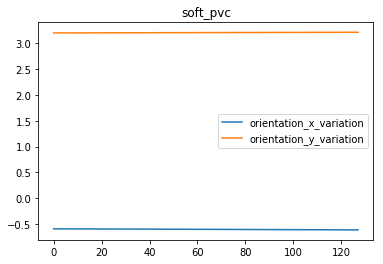

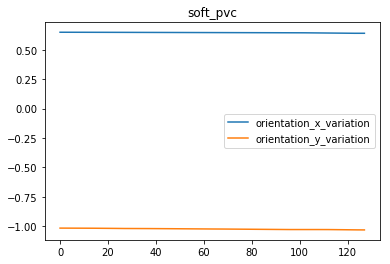

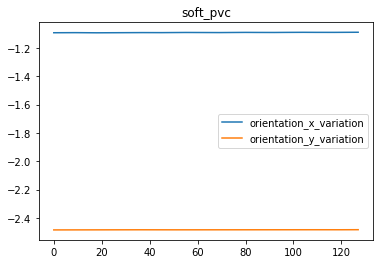

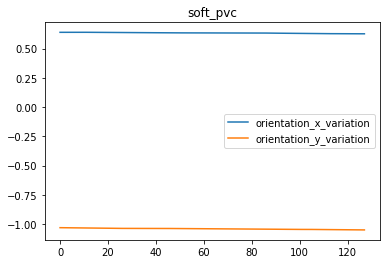

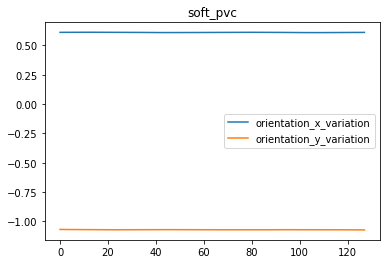

In [72]:
plot_some_column(x_train,y_train,'soft_pvc',('orientation_x_variation','orientation_y_variation'),5)

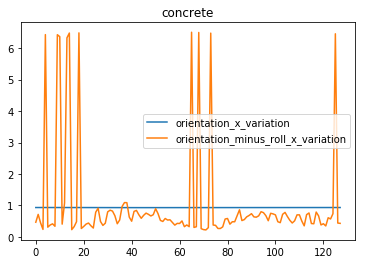

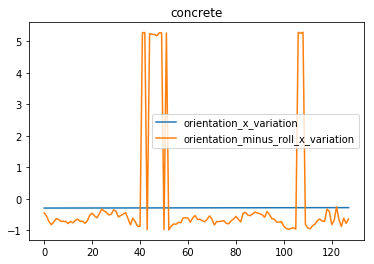

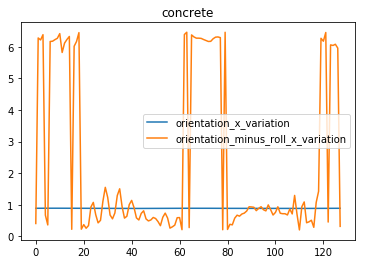

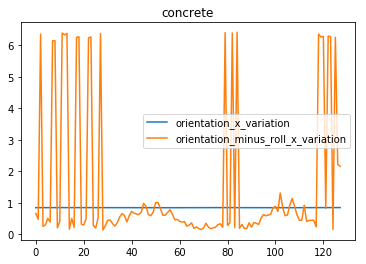

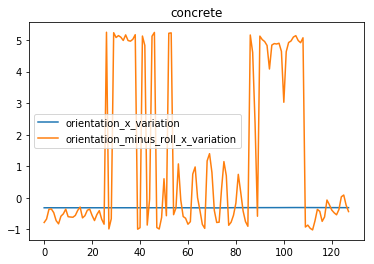

In [95]:
plot_some_column(x_train,y_train,'concrete',('orientation_x_variation','orientation_minus_roll_x_variation'),5)

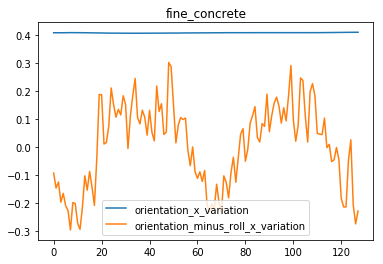

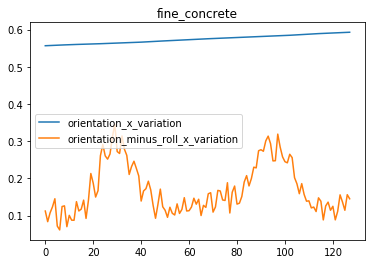

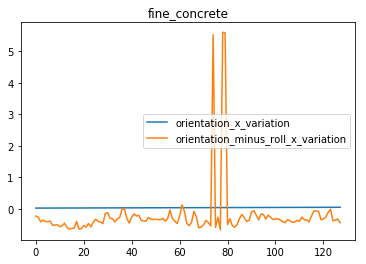

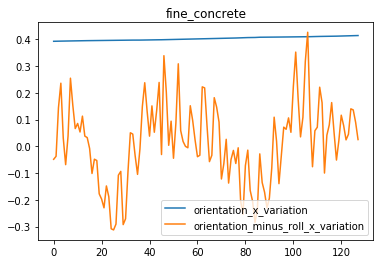

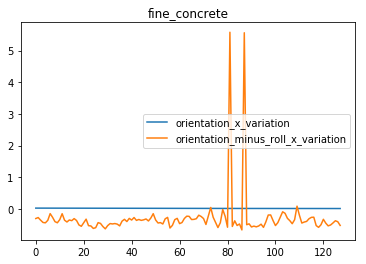

In [96]:
plot_some_column(x_train,y_train,'fine_concrete',('orientation_x_variation','orientation_minus_roll_x_variation'),5)

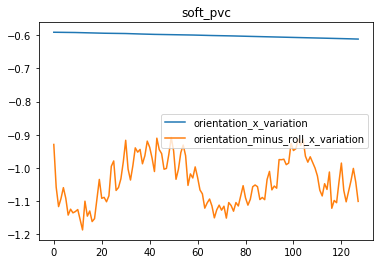

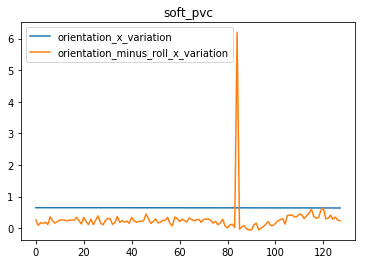

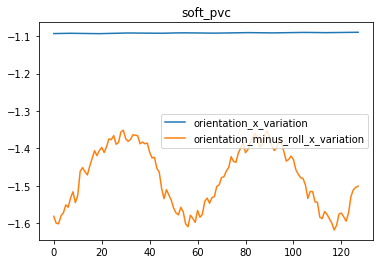

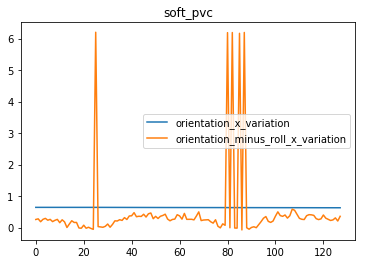

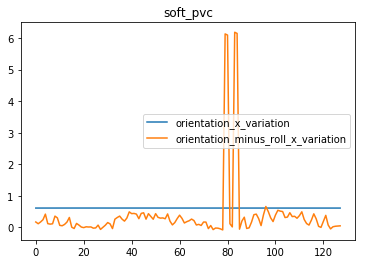

In [97]:
plot_some_column(x_train,y_train,'soft_pvc',('orientation_x_variation','orientation_minus_roll_x_variation'),5)